In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
import warnings

sys.path.insert(0, os.path.abspath('..'))
sys.path.insert(0, os.path.abspath('.'))
from src.local.etl_helper import Extract as local_extractor
from src.local.feature_engineering_helper import MutualInformation as mi_extractor
from src.local.feature_engineering_helper import CorrCoef as corr_extractor

from src.utility.utils import Logger


warnings.filterwarnings('ignore')

In [2]:
!tree ../data

../data
├── __init__.py
├── season.csv
├── submission.csv
├── test.csv
└── train.csv

0 directories, 5 files


## read data

In [3]:
# we translate Chinese column names to English
df_col_mapping = {
    '加班數': 'overtime_cnt',
    '出差數A': 'biz_trip_cnt_A',  # business trip
    '出差數B': 'biz_trip_cnt_B',  # business trip
    '請假數A': 'take_a_day_off_cnt_A',
    '請假數B': 'take_a_day_off_cnt_B',

    '工作分類': 'job_classification',
    '職等': 'job_grade',
    '廠區代碼': 'factory_code',
    '管理層級': 'admin_level',
    '工作資歷1': 'work_experience_1',
    '工作資歷2': 'work_experience_2',
    '工作資歷3': 'work_experience_3',
    '工作資歷4': 'work_experience_4',
    '工作資歷5': 'work_experience_5',
    '專案時數': 'project_schedule',
    '專案總數': 'project_cnt',
    '當前專案角色': 'role_in_project',
    '特殊專案佔比': 'special_project_pct',
    '工作地點': 'work_loc',
    '訓練時數A': 'training_hour_A',
    '訓練時數B': 'training_hour_B',
    '訓練時數C': 'training_hour_C',
    '生產總額': 'produce_total_amount',
    '榮譽數': 'honor_cnt',
    '是否升遷': 'promotion',
    '升遷速度': 'promote_speed',
    '近三月請假數A': 'take_day_off_recent_3_month_A',
    '近一年請假數A': 'take_day_off_recent_1_year_A',
    '近三月請假數B': 'take_day_off_recent_3_month_B',
    '近一年請假數B': 'take_day_off_recent_1_year_B',
    '出差數A': 'biz_trip_cnt_A',
    '出差數B': 'biz_trip_cnt_B',
    '出差集中度': 'biz_trip_concentration_ratio',
    '年度績效等級A': 'yearly_performance_grade_A',
    '年度績效等級B': 'yearly_performance_grade_B',
    '年度績效等級C': 'yearly_performance_grade_C',
    '年齡層級': 'age_level',
    '婚姻狀況': 'marital_status',
    '年資層級A': 'seniority_level_A',
    '年資層級B': 'seniority_level_B',
    '年資層級C': 'seniority_level_C',
    '任職前工作平均年數': 'avg_work_year_before',
    '最高學歷': 'educational_level',
    '畢業學校類別': 'gratuation school',
    '畢業科系類別': 'gratuation dept',
    '眷屬量': 'family_dependants',
    '通勤成本': 'commuting_cost',
    '歸屬部門': 'department',
}

### season

[2021-04-05 18:15:46,703] - p64807 - {/Users/johnson.huang/py_ds/AIdea/playground/employee_resign/src/local/etl_helper.py:28} - extract - INFO - shape: (72684, 8)
[2021-04-05 18:15:46,704] - p64807 - {/Users/johnson.huang/py_ds/AIdea/playground/employee_resign/src/local/etl_helper.py:29} - extract - INFO - columns: Index(['yyyy', 'periodQ', 'PerNo', 'overtime_cnt', 'biz_trip_cnt_A',
       'biz_trip_cnt_B', 'take_a_day_off_cnt_A', 'take_a_day_off_cnt_B'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72684 entries, 0 to 72683
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   yyyy                  72684 non-null  int64 
 1   periodQ               72684 non-null  object
 2   PerNo                 72684 non-null  int64 
 3   overtime_cnt          72684 non-null  int64 
 4   biz_trip_cnt_A        72684 non-null  int64 
 5   biz_trip_cnt_B        72684 non-null  int64 
 6   take_

,yyyy,periodQ,PerNo,overtime_cnt,biz_trip_cnt_A,biz_trip_cnt_B,take_a_day_off_cnt_A,take_a_day_off_cnt_B
0,2014,2014Q1,1,0,8,0,1,0
1,2014,2014Q1,3,0,0,0,2,0
2,2014,2014Q1,6,0,2,0,1,0


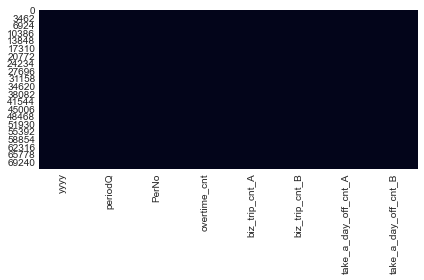

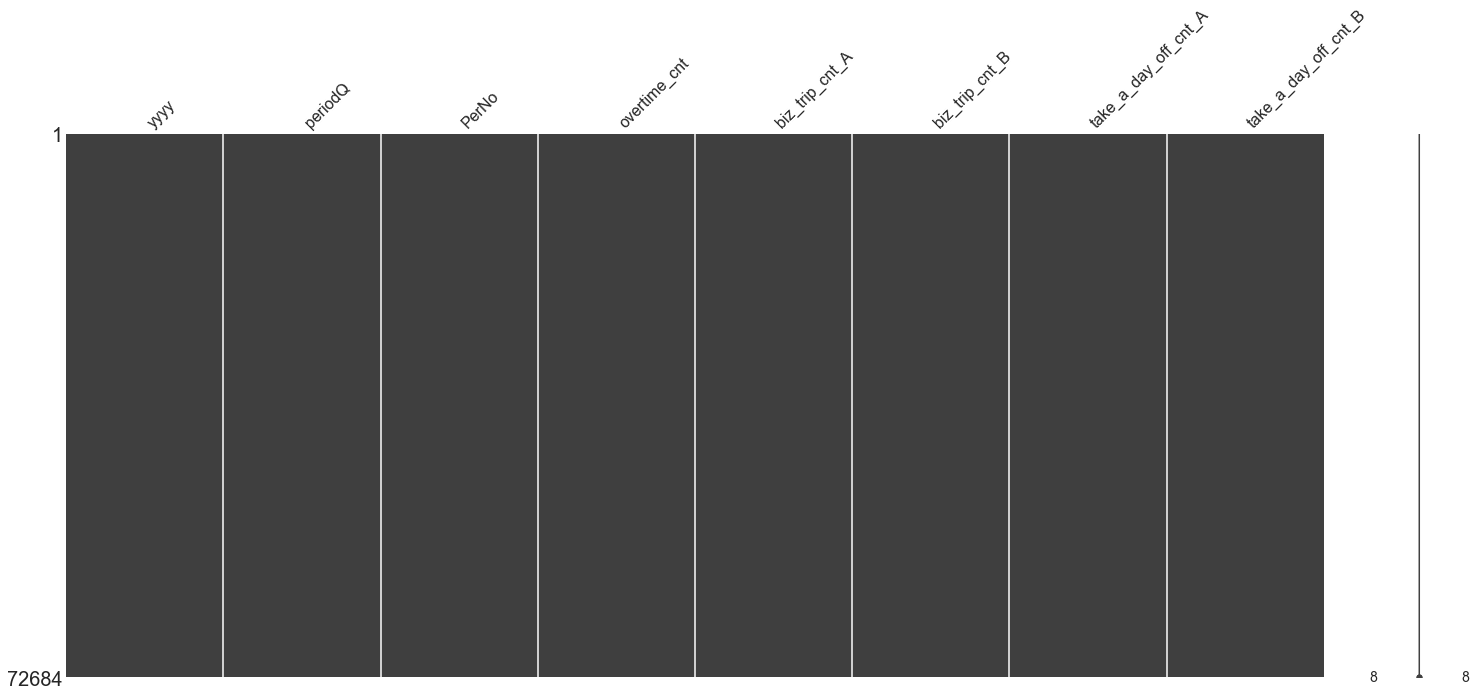

In [4]:
df_season = local_extractor().read(file_path='../data/season.csv', col_mapping=df_col_mapping)
df_season.head(3)

In [5]:
# sns.set_style("darkgrid",{"font.sans-serif":['simhei','Droid Sans Fallback']})
# msno.heatmap(df_season)

### train

[2021-04-05 18:15:48,219] - p64807 - {/Users/johnson.huang/py_ds/AIdea/playground/employee_resign/src/local/etl_helper.py:28} - extract - INFO - shape: (14392, 47)
[2021-04-05 18:15:48,220] - p64807 - {/Users/johnson.huang/py_ds/AIdea/playground/employee_resign/src/local/etl_helper.py:29} - extract - INFO - columns: Index(['yyyy', 'PerNo', 'PerStatus', 'sex', 'job_classification', 'job_grade',
       'factory_code', 'admin_level', 'work_experience_1', 'work_experience_2',
       'work_experience_3', 'work_experience_4', 'work_experience_5',
       'project_schedule', 'project_cnt', 'role_in_project',
       'special_project_pct', 'work_loc', 'training_hour_A', 'training_hour_B',
       'training_hour_C', 'produce_total_amount', 'honor_cnt', 'promotion',
       'promote_speed', 'take_day_off_recent_3_month_A',
       'take_day_off_recent_1_year_A', 'take_day_off_recent_3_month_B',
       'take_day_off_recent_1_year_B', 'biz_trip_cnt_A', 'biz_trip_cnt_B',
       'biz_trip_concentration_r

,yyyy,PerNo,PerStatus,sex,job_classification,job_grade,factory_code,admin_level,work_experience_1,work_experience_2,...,seniority_level_A,seniority_level_B,seniority_level_C,avg_work_year_before,educational_level,gratuation school,gratuation dept,family_dependants,commuting_cost,department
0,2014,1,0,1.0,1.0,3.0,19.0,4.0,0.0,1.0,...,2.0,1.0,1.0,2.0,NaN,NaN,5.0,0.0,8.0,19138.0
1,2015,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,...,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
2,2016,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,...,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
3,2017,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,...,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
4,2014,3,0,0.0,1.0,4.0,8.0,1.0,0.0,0.0,...,5.0,5.0,0.0,0.0,2.0,4.0,1.0,2.0,8.0,8181.0


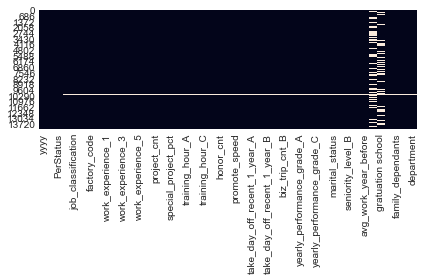

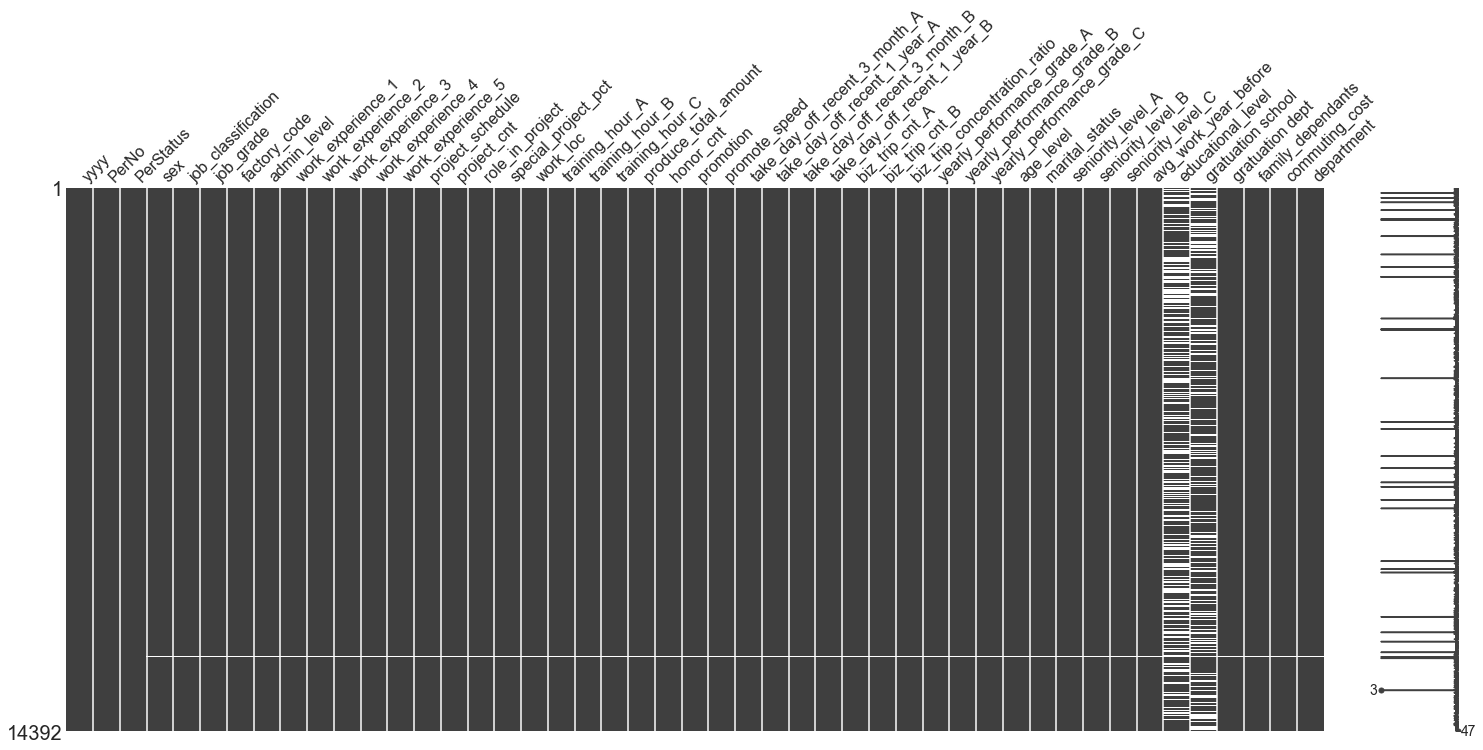

In [6]:
df_train = local_extractor().read(file_path='../data/train.csv', col_mapping=df_col_mapping)
df_train.head(5)

<AxesSubplot:>

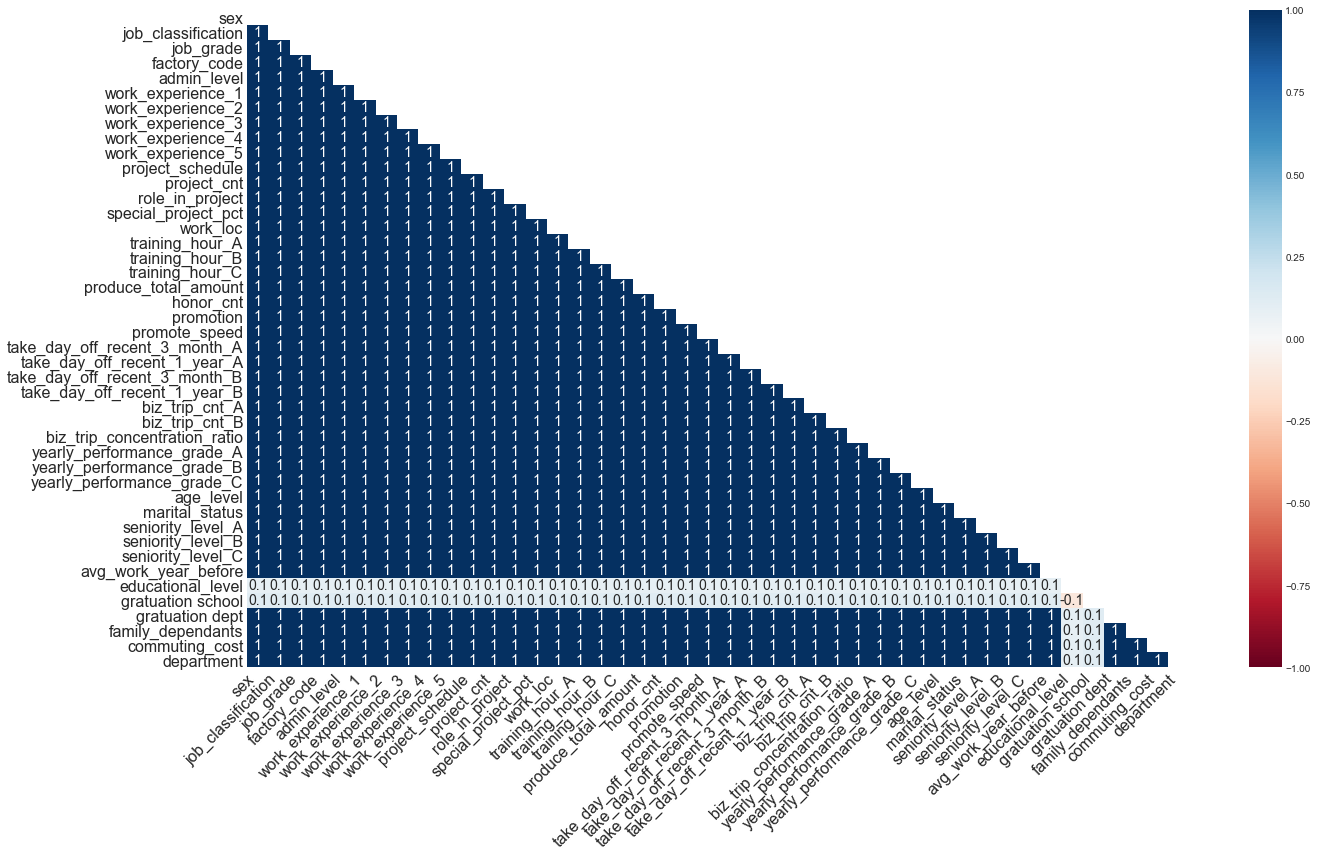

In [7]:
msno.heatmap(df_train)

In [8]:
sorted(list(set(df_season.columns) - set(df_train.columns)))

['overtime_cnt', 'periodQ', 'take_a_day_off_cnt_A', 'take_a_day_off_cnt_B']

In [9]:
df_train.columns

Index(['yyyy', 'PerNo', 'PerStatus', 'sex', 'job_classification', 'job_grade',
       'factory_code', 'admin_level', 'work_experience_1', 'work_experience_2',
       'work_experience_3', 'work_experience_4', 'work_experience_5',
       'project_schedule', 'project_cnt', 'role_in_project',
       'special_project_pct', 'work_loc', 'training_hour_A', 'training_hour_B',
       'training_hour_C', 'produce_total_amount', 'honor_cnt', 'promotion',
       'promote_speed', 'take_day_off_recent_3_month_A',
       'take_day_off_recent_1_year_A', 'take_day_off_recent_3_month_B',
       'take_day_off_recent_1_year_B', 'biz_trip_cnt_A', 'biz_trip_cnt_B',
       'biz_trip_concentration_ratio', 'yearly_performance_grade_A',
       'yearly_performance_grade_B', 'yearly_performance_grade_C', 'age_level',
       'marital_status', 'seniority_level_A', 'seniority_level_B',
       'seniority_level_C', 'avg_work_year_before', 'educational_level',
       'gratuation school', 'gratuation dept', 'family_depend

age_level                        0.019810
work_experience_3                0.016538
seniority_level_A                0.015953
take_day_off_recent_3_month_B    0.015267
training_hour_A                  0.015118
seniority_level_B                0.013120
work_loc                         0.010922
department                       0.009013
training_hour_C                  0.008676
work_experience_1                0.008432
special_project_pct              0.006360
job_grade                        0.005221
biz_trip_cnt_A                   0.005033
admin_level                      0.004825
take_day_off_recent_1_year_A     0.004113
biz_trip_concentration_ratio     0.003734
take_day_off_recent_1_year_B     0.002871
seniority_level_C                0.002360
produce_total_amount             0.001381
role_in_project                  0.001213
Name: MI Scores, dtype: float64 

project_schedule      0.0
work_experience_4     0.0
factory_code          0.0
job_classification    0.0
promote_speed         

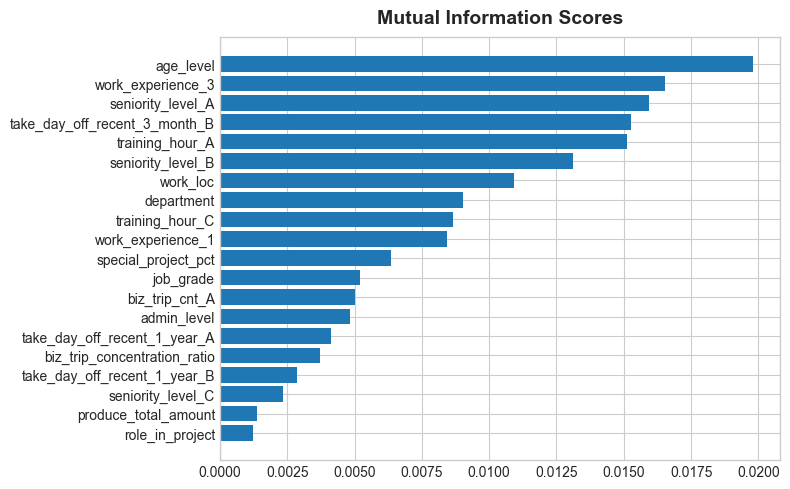

In [10]:
X = df_train.copy().fillna(0)
y = X.pop('PerStatus')

mi_scores = mi_extractor.make_mi_scores(X, y)
print(mi_scores.head(20), "\n")
print(mi_scores.tail(5))

plt.figure(dpi=100, figsize=(8, 5))
mi_extractor.plot_mi_scores(mi_scores.head(20))

In [11]:
df_train['sex'] = df_train['sex'].fillna(0).astype(int)

---
# need to astype to int to find correlations!!!

need to implement 
```
def printPercentile(x) :
    print("<< %s >>" % x)
    for i in range(10, 91, 10):
        print("第 %s 百分位數 ： %s" % (i, np.percentile(df[x], i)))
    print("\n<< Summary statistics >> \n%s" % df[x].describe())
```
---

In [12]:
corr_extractor().plot(df_train[['yyyy', 'PerNo', 'sex', 'PerStatus', 'work_loc']])

AssertionError: not all columns are int type

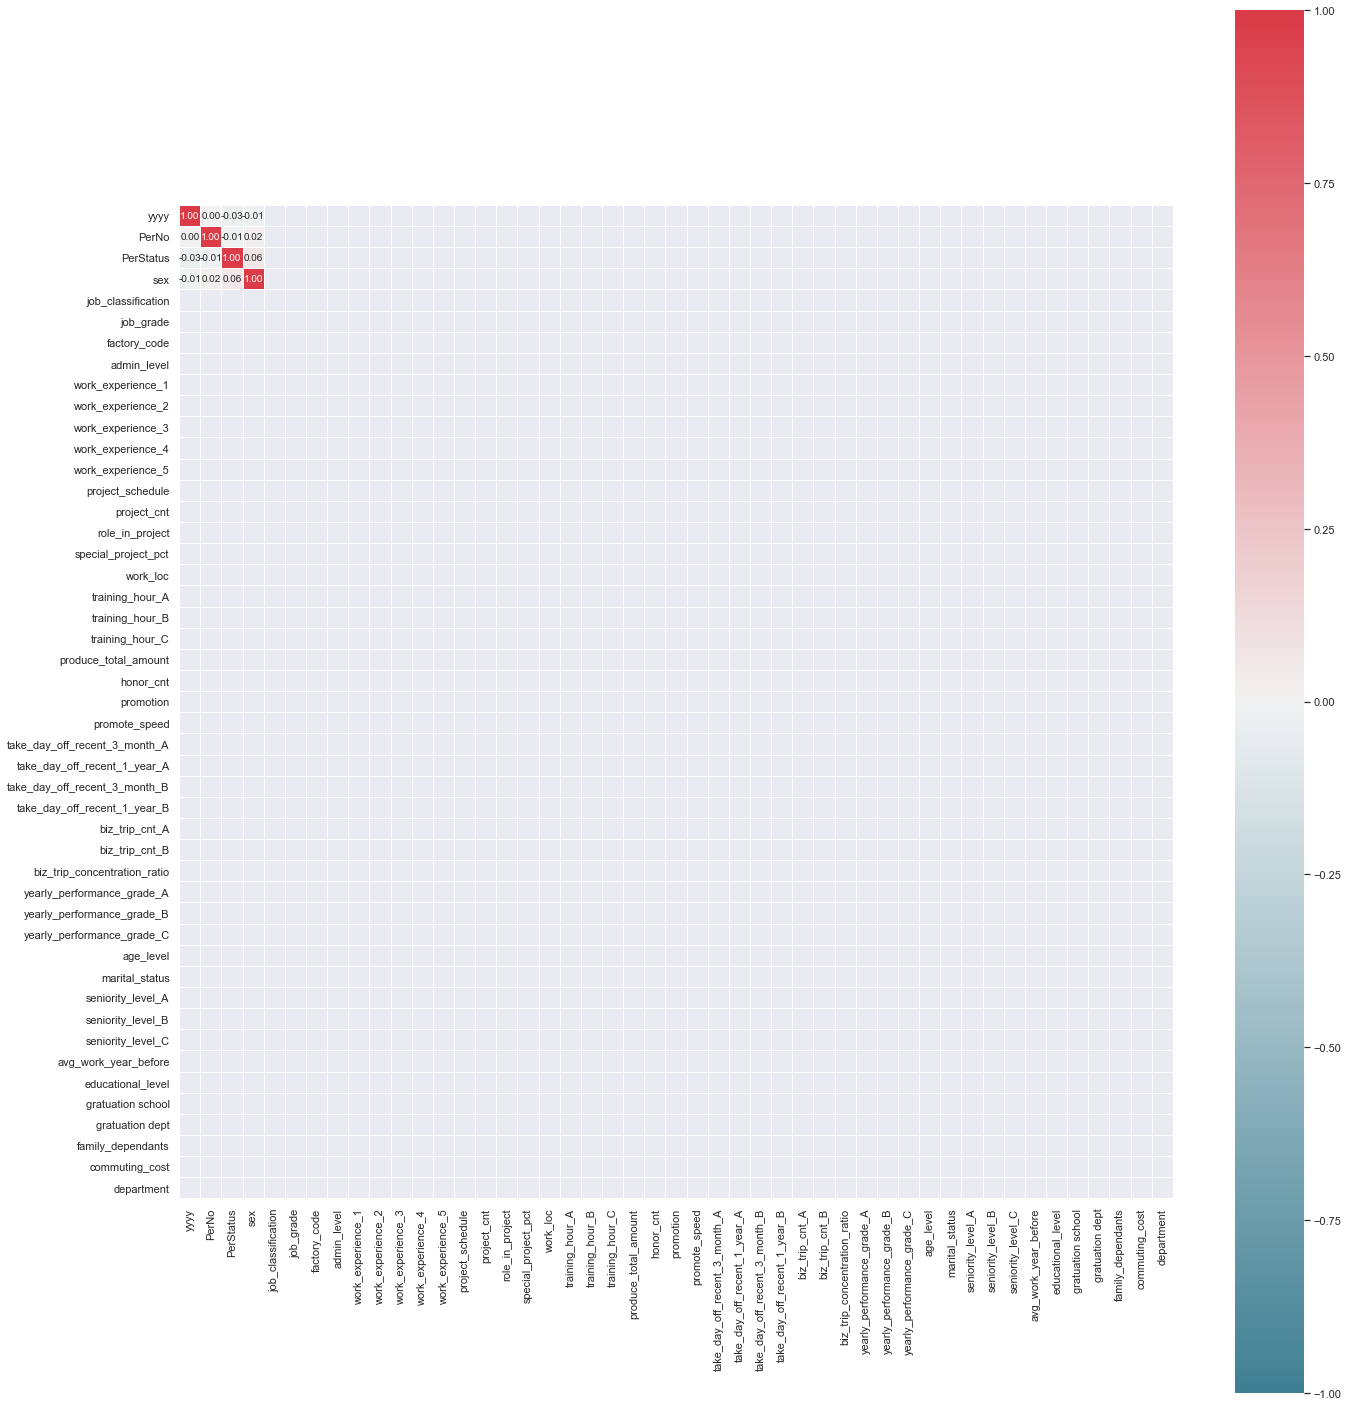

In [61]:
df_train_cols = list(df_train.columns)
fig, ax = plt.subplots(figsize=(20,20))

cm = np.corrcoef(df_train[df_train_cols].values.T)
sns.set(font_scale = 1)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = ".2f", annot_kws = {"size" : 10},
                 linewidths = 0.5,
                 vmin = -1.0, vmax = 1.0,
                 cmap = sns.diverging_palette(220, 10, as_cmap=True), #"YlGnBu",
                yticklabels = df_train_cols, xticklabels = df_train_cols)

In [11]:
mi_scores[0:5].index

Index(['age_level', 'work_experience_3', 'seniority_level_A',
       'take_day_off_recent_3_month_B', 'training_hour_A'],
      dtype='object')

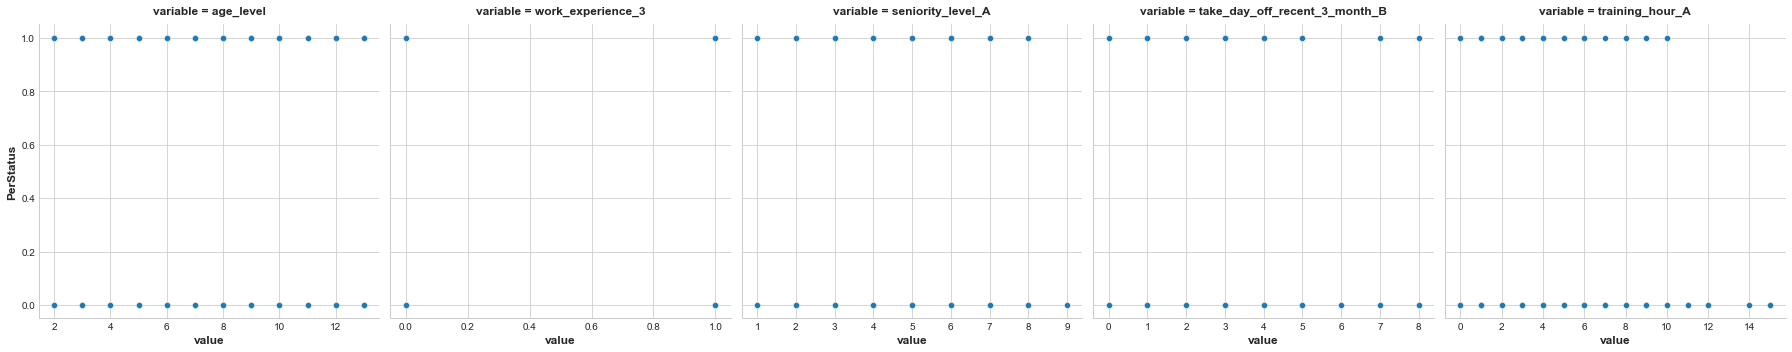

In [12]:
features = ['age_level', 
            'work_experience_3', 
            'seniority_level_A',
            'take_day_off_recent_3_month_B', 
            'training_hour_A']
sns.relplot(
    x="value", y="PerStatus", col="variable", data=df_train.melt(id_vars="PerStatus", value_vars=features), facet_kws=dict(sharex=False),
);

In [ ]:
sns.pairplot(data=train_df.assign(target=target_df, 
                                  hue='target')

array([[<AxesSubplot:title={'center':'yyyy'}>,
        <AxesSubplot:title={'center':'PerNo'}>,
        <AxesSubplot:title={'center':'PerStatus'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'job_classification'}>,
        <AxesSubplot:title={'center':'job_grade'}>,
        <AxesSubplot:title={'center':'factory_code'}>],
       [<AxesSubplot:title={'center':'admin_level'}>,
        <AxesSubplot:title={'center':'work_experience_1'}>,
        <AxesSubplot:title={'center':'work_experience_2'}>,
        <AxesSubplot:title={'center':'work_experience_3'}>,
        <AxesSubplot:title={'center':'work_experience_4'}>,
        <AxesSubplot:title={'center':'work_experience_5'}>,
        <AxesSubplot:title={'center':'project_schedule'}>],
       [<AxesSubplot:title={'center':'project_cnt'}>,
        <AxesSubplot:title={'center':'role_in_project'}>,
        <AxesSubplot:title={'center':'special_project_pct'}>,
        <AxesSubplot:title={'center':'work_loc'}>,

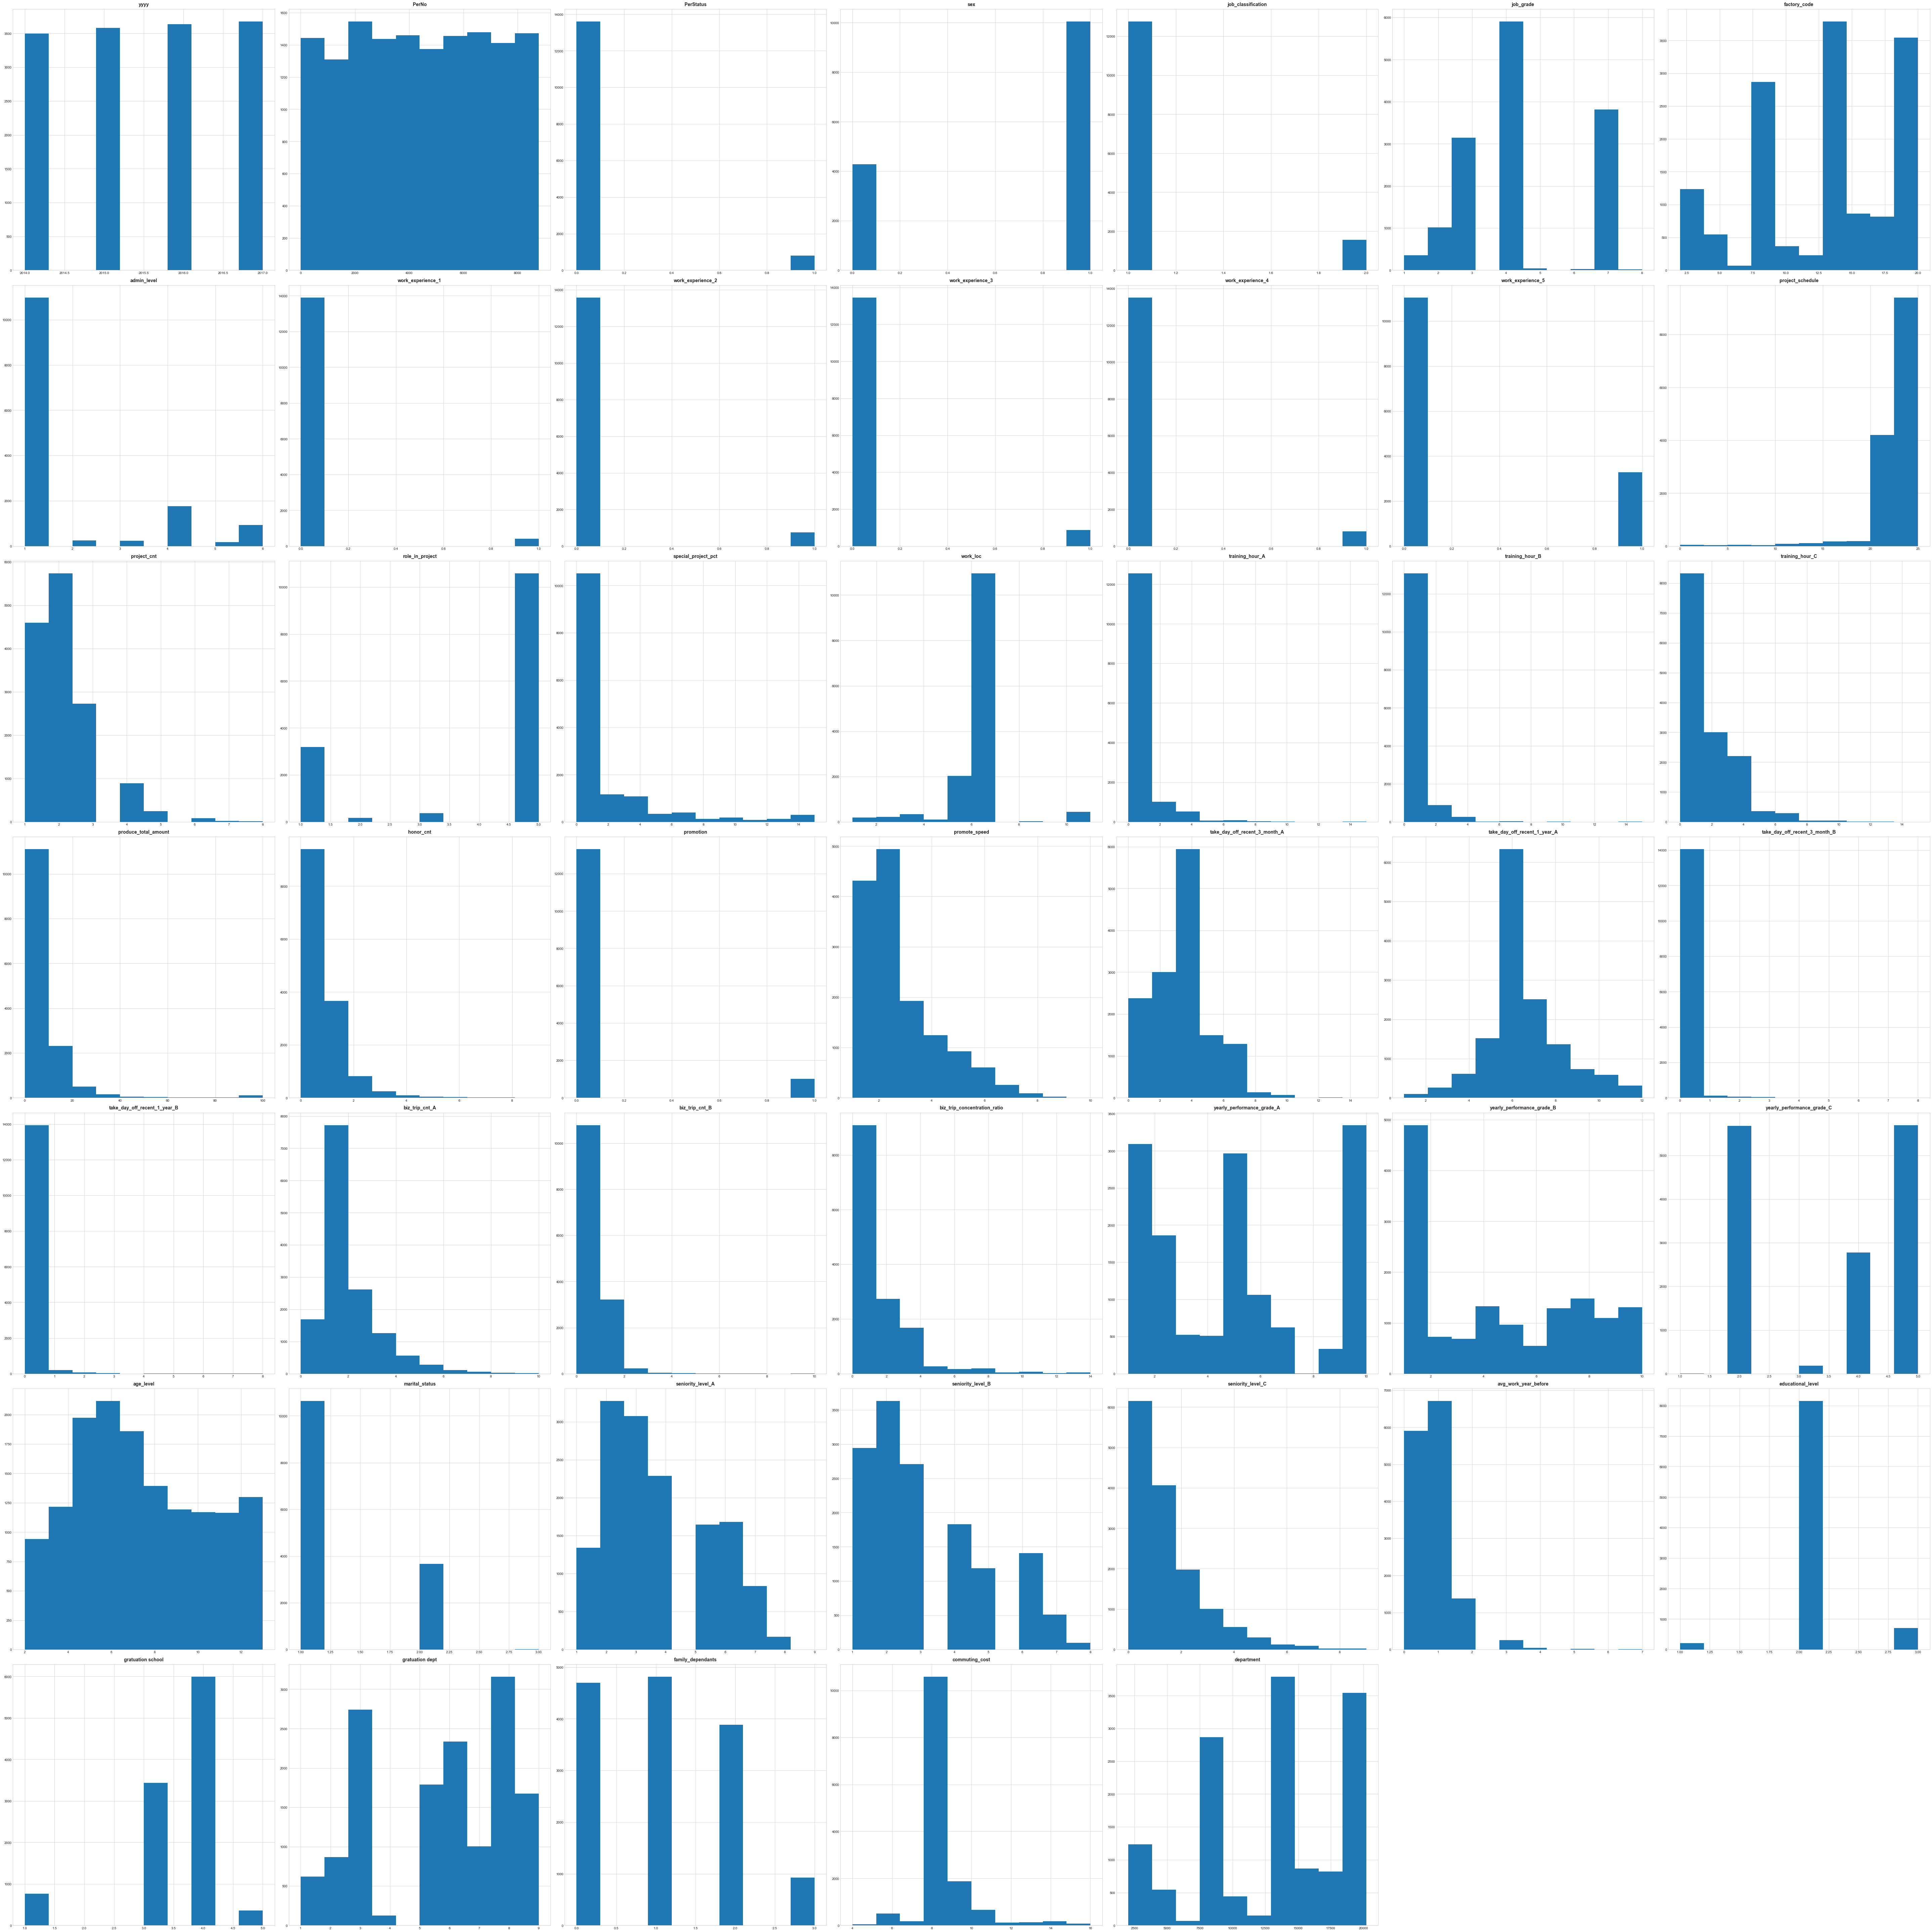

In [48]:
df_train.hist(figsize=(80,80))

In [41]:
features

['age_level',
 'work_experience_3',
 'seniority_level_A',
 'take_day_off_recent_3_month_B',
 'training_hour_A']

NameError: name 'sfg' is not defined

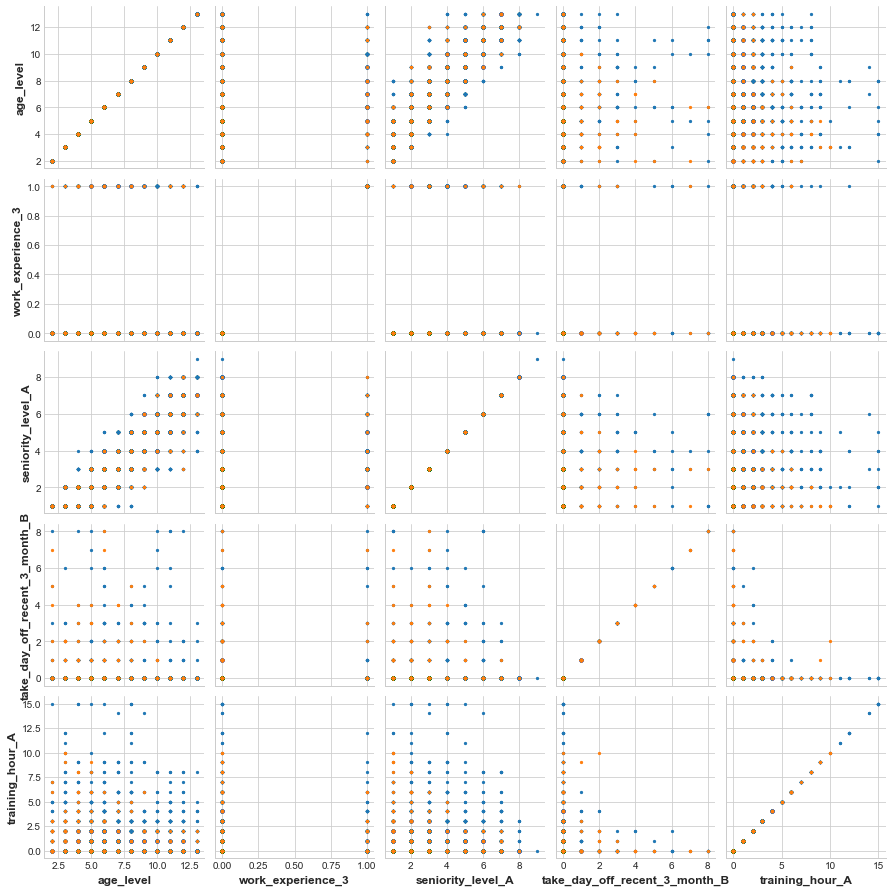

<Figure size 936x576 with 0 Axes>

In [47]:

        
import matplotlib.gridspec as gridspec

g1 = sns.PairGrid(df_train[['age_level',
 'work_experience_3',
 'seniority_level_A',
 'take_day_off_recent_3_month_B',
 'training_hour_A', 'PerStatus']], hue="PerStatus")
g1.map(plt.scatter, s=5)

fig = plt.figure(figsize=(13,8))
gs = gridspec.GridSpec(2, 2)

mg0 = sfg.SeabornFig2Grid(g0, fig, gs[0])
mg1 = sfg.SeabornFig2Grid(g1, fig, gs[1])


gs.tight_layout(fig)
#gs.update(top=0.7)

plt.show()

In [13]:
mi_scores = mi_extractor.make_mi_scores(X, y)

### test

[2021-04-04 18:13:21,801] - p48072 - {/Users/johnson.huang/py_ds/AIdea/playground/employee_resign/src/local/etl_helper.py:28} - extract - INFO - shape: (3739, 47)
[2021-04-04 18:13:21,802] - p48072 - {/Users/johnson.huang/py_ds/AIdea/playground/employee_resign/src/local/etl_helper.py:29} - extract - INFO - columns: Index(['yyyy', 'PerNo', 'PerStatus', 'sex', 'job_classification', 'job_grade',
       'factory_code', 'admin_level', 'work_experience_1', 'work_experience_2',
       'work_experience_3', 'work_experience_4', 'work_experience_5',
       'project_schedule', 'project_cnt', 'role_in_project',
       'special_project_pct', 'work_loc', 'training_hour_A', 'training_hour_B',
       'training_hour_C', 'produce_total_amount', 'honor_cnt', 'promotion',
       'promote_speed', 'take_day_off_recent_3_month_A',
       'take_day_off_recent_1_year_A', 'take_day_off_recent_3_month_B',
       'take_day_off_recent_1_year_B', 'biz_trip_cnt_A', 'biz_trip_cnt_B',
       'biz_trip_concentration_ra

,yyyy,PerNo,PerStatus,sex,job_classification,job_grade,factory_code,admin_level,work_experience_1,work_experience_2,...,seniority_level_A,seniority_level_B,seniority_level_C,avg_work_year_before,educational_level,gratuation school,gratuation dept,family_dependants,commuting_cost,department
0,2018,1,NaN,1.0,1.0,3.0,19.0,6.0,0.0,1.0,...,3.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
1,2018,3,NaN,0.0,1.0,4.0,8.0,1.0,0.0,0.0,...,6.0,6.0,0.0,0.0,2.0,4.0,1.0,2.0,8.0,8181.0
2,2018,7,NaN,0.0,1.0,4.0,4.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,NaN,NaN,5.0,0.0,10.0,4010.0
3,2018,15,NaN,0.0,1.0,4.0,2.0,4.0,0.0,0.0,...,3.0,1.0,4.0,2.0,NaN,4.0,8.0,2.0,9.0,2177.0
4,2018,16,NaN,0.0,1.0,4.0,12.0,1.0,0.0,0.0,...,3.0,1.0,3.0,1.0,2.0,3.0,3.0,2.0,10.0,12072.0


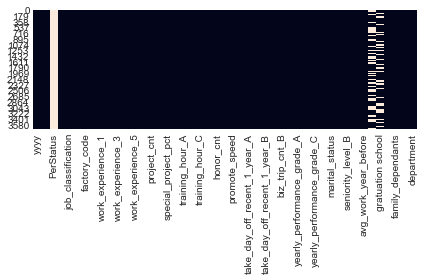

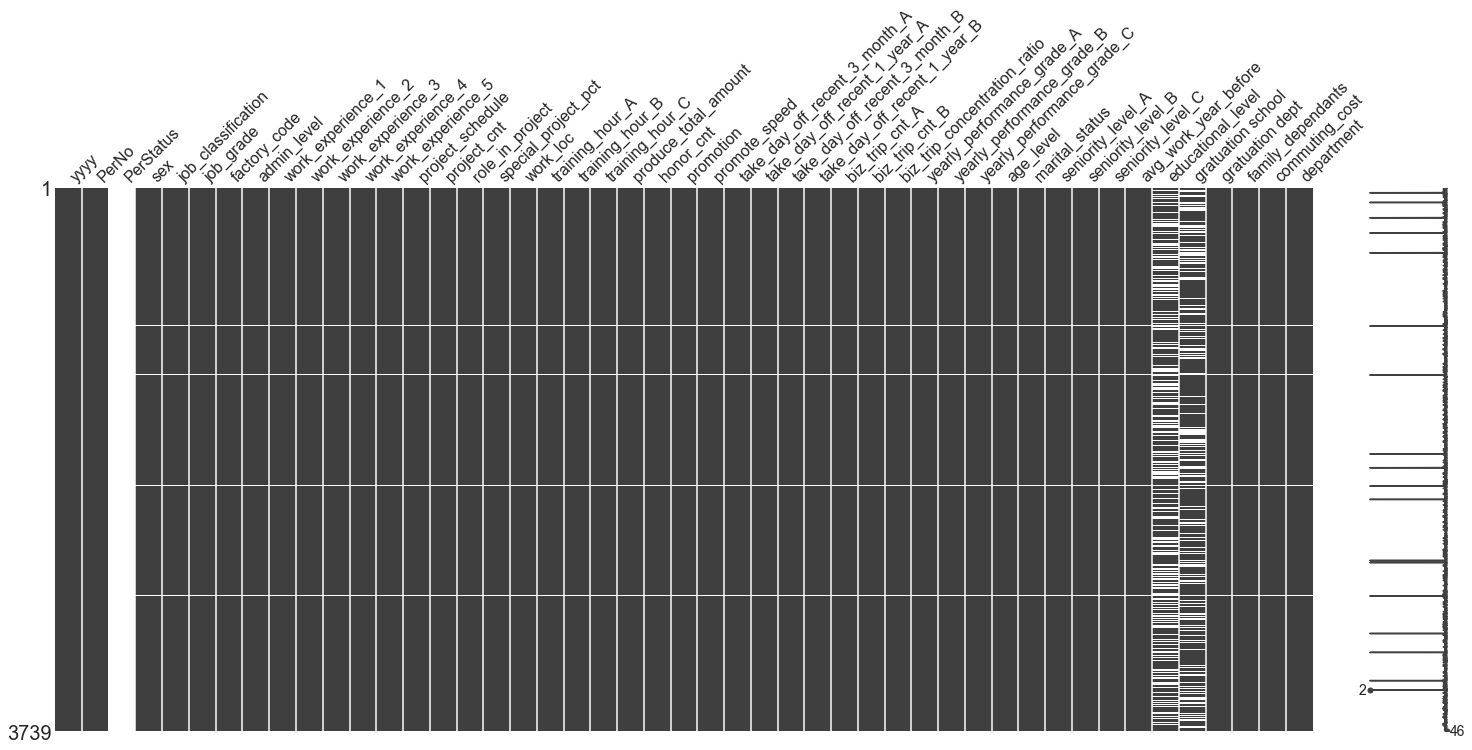

In [14]:
df_test = local_extractor().read(file_path='../data/test.csv', col_mapping=df_col_mapping)
df_test.head(5)

In [15]:
df_train.loc[df_train['PerNo']==1, :]

,yyyy,PerNo,PerStatus,sex,job_classification,job_grade,factory_code,admin_level,work_experience_1,work_experience_2,...,seniority_level_A,seniority_level_B,seniority_level_C,avg_work_year_before,educational_level,gratuation school,gratuation dept,family_dependants,commuting_cost,department
0,2014,1,0,1.0,1.0,3.0,19.0,4.0,0.0,1.0,...,2.0,1.0,1.0,2.0,NaN,NaN,5.0,0.0,8.0,19138.0
1,2015,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,...,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
2,2016,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,...,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
3,2017,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,...,2.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0


In [16]:
df_test.loc[df_test['PerNo']==1, :]

,yyyy,PerNo,PerStatus,sex,job_classification,job_grade,factory_code,admin_level,work_experience_1,work_experience_2,...,seniority_level_A,seniority_level_B,seniority_level_C,avg_work_year_before,educational_level,gratuation school,gratuation dept,family_dependants,commuting_cost,department
0,2018,1,NaN,1.0,1.0,3.0,19.0,6.0,0.0,1.0,...,3.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0


In [17]:
df_test.loc[df_test['sex'].isnull(), :]

,yyyy,PerNo,PerStatus,sex,job_classification,job_grade,factory_code,admin_level,work_experience_1,work_experience_2,...,seniority_level_A,seniority_level_B,seniority_level_C,avg_work_year_before,educational_level,gratuation school,gratuation dept,family_dependants,commuting_cost,department
34,2018,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,2018,276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,2018,535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311,2018,785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
447,2018,1075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
951,2018,2317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1288,2018,3109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1830,2018,4324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1925,2018,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2051,2018,4831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[2021-04-04 18:13:23,238] - p48072 - {/Users/johnson.huang/py_ds/AIdea/playground/employee_resign/src/local/etl_helper.py:28} - extract - INFO - shape: (3739, 2)
[2021-04-04 18:13:23,239] - p48072 - {/Users/johnson.huang/py_ds/AIdea/playground/employee_resign/src/local/etl_helper.py:29} - extract - INFO - columns: Index(['PerNo', 'PerStatus'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   PerNo      3739 non-null   int64
 1   PerStatus  3739 non-null   int64
dtypes: int64(2)
memory usage: 58.5 KB
[2021-04-04 18:13:23,248] - p48072 - {/Users/johnson.huang/py_ds/AIdea/playground/employee_resign/src/local/etl_helper.py:30} - extract - INFO - None
[2021-04-04 18:13:23,250] - p48072 - {/Users/johnson.huang/py_ds/AIdea/playground/employee_resign/src/local/etl_helper.py:37} - extract - INFO - missing percentage: 0.00%


,PerNo,PerStatus
0,1,0
1,3,0
2,7,0


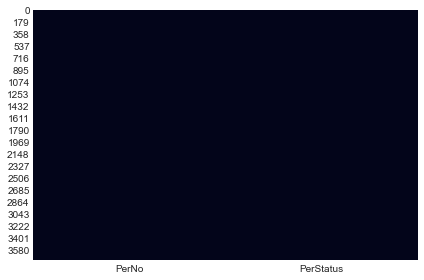

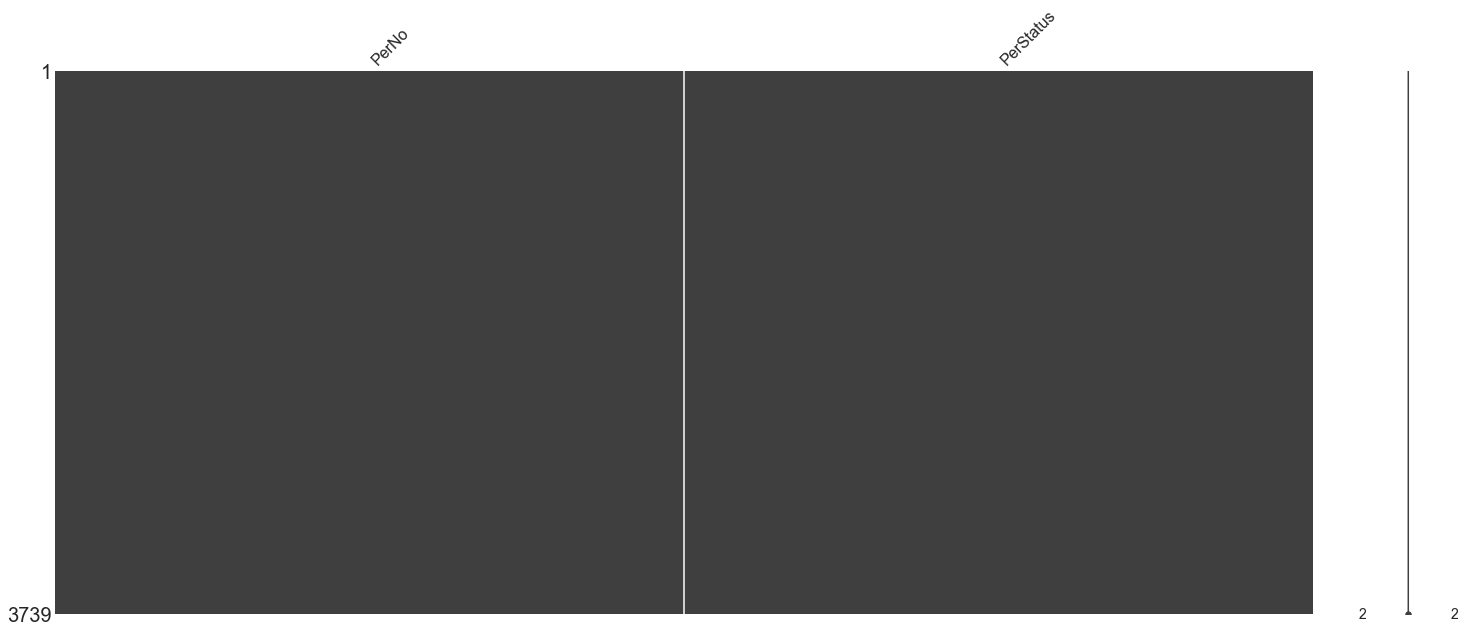

In [18]:
df_submission = local_extractor().read(file_path='../data/submission.csv')
df_submission.head(3)

## base line model

In [19]:
from sklearn.model_selection import train_test_split

X = df_train.loc[:, ~df_train.columns.isin(['PerStatus'])]
y = df_train['PerStatus']

train_X, val_X, train_y, val_y = train_test_split(X.values, y.values, test_size=0.2)

In [20]:
type(train_X)

numpy.ndarray

In [21]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth=3, n_estimators=300, 
                    learning_rate=0.05, random_state = 87)

# X_train = df_train.loc[:, ~df_train.columns.isin(['PerStatus'])]
# y_train = df_train['PerStatus']

xgb.fit(train_X, train_y)


[18:13:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=4, num_parallel_tree=1, random_state=87,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [22]:
val_pred = xgb.predict(val_X)
val_pred

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(val_pred, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE for best value of max_leaf_nodes: 0


In [24]:
list(set(df_train.columns) - set(df_test.columns))

[]

In [25]:
list(set(df_test.columns) - set(df_train.columns))

[]

In [26]:
df_test.columns

Index(['yyyy', 'PerNo', 'PerStatus', 'sex', 'job_classification', 'job_grade',
       'factory_code', 'admin_level', 'work_experience_1', 'work_experience_2',
       'work_experience_3', 'work_experience_4', 'work_experience_5',
       'project_schedule', 'project_cnt', 'role_in_project',
       'special_project_pct', 'work_loc', 'training_hour_A', 'training_hour_B',
       'training_hour_C', 'produce_total_amount', 'honor_cnt', 'promotion',
       'promote_speed', 'take_day_off_recent_3_month_A',
       'take_day_off_recent_1_year_A', 'take_day_off_recent_3_month_B',
       'take_day_off_recent_1_year_B', 'biz_trip_cnt_A', 'biz_trip_cnt_B',
       'biz_trip_concentration_ratio', 'yearly_performance_grade_A',
       'yearly_performance_grade_B', 'yearly_performance_grade_C', 'age_level',
       'marital_status', 'seniority_level_A', 'seniority_level_B',
       'seniority_level_C', 'avg_work_year_before', 'educational_level',
       'gratuation school', 'gratuation dept', 'family_depend

In [27]:
df_test.head()

,yyyy,PerNo,PerStatus,sex,job_classification,job_grade,factory_code,admin_level,work_experience_1,work_experience_2,...,seniority_level_A,seniority_level_B,seniority_level_C,avg_work_year_before,educational_level,gratuation school,gratuation dept,family_dependants,commuting_cost,department
0,2018,1,NaN,1.0,1.0,3.0,19.0,6.0,0.0,1.0,...,3.0,2.0,1.0,2.0,NaN,NaN,5.0,2.0,8.0,19138.0
1,2018,3,NaN,0.0,1.0,4.0,8.0,1.0,0.0,0.0,...,6.0,6.0,0.0,0.0,2.0,4.0,1.0,2.0,8.0,8181.0
2,2018,7,NaN,0.0,1.0,4.0,4.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,NaN,NaN,5.0,0.0,10.0,4010.0
3,2018,15,NaN,0.0,1.0,4.0,2.0,4.0,0.0,0.0,...,3.0,1.0,4.0,2.0,NaN,4.0,8.0,2.0,9.0,2177.0
4,2018,16,NaN,0.0,1.0,4.0,12.0,1.0,0.0,0.0,...,3.0,1.0,3.0,1.0,2.0,3.0,3.0,2.0,10.0,12072.0


In [28]:
df_submission.head()

,PerNo,PerStatus
0,1,0
1,3,0
2,7,0
3,15,0
4,16,0


In [29]:
test_X = df_test[X.columns].values
test_X

array([[2.0180e+03, 1.0000e+00, 1.0000e+00, ..., 2.0000e+00, 8.0000e+00,
        1.9138e+04],
       [2.0180e+03, 3.0000e+00, 0.0000e+00, ..., 2.0000e+00, 8.0000e+00,
        8.1810e+03],
       [2.0180e+03, 7.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+01,
        4.0100e+03],
       ...,
       [2.0180e+03, 8.7670e+03, 1.0000e+00, ..., 0.0000e+00, 8.0000e+00,
        1.3084e+04],
       [2.0180e+03, 8.7740e+03, 1.0000e+00, ..., 2.0000e+00, 8.0000e+00,
        8.0120e+03],
       [2.0180e+03, 8.7750e+03, 1.0000e+00, ..., 0.0000e+00, 9.0000e+00,
        8.2060e+03]])

In [30]:
test_pred = xgb.predict(test_X)
test_pred

array([0, 0, 0, ..., 0, 0, 0])

## model 2

In [31]:
from sklearn.model_selection import train_test_split

X = df_train.loc[:, ~df_train.columns.isin(['PerStatus'])]
X = X[features]
y = df_train['PerStatus']

train_X, val_X, train_y, val_y = train_test_split(X.values, y.values, test_size=0.2)



from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth=3, n_estimators=300, 
                    learning_rate=0.05, random_state = 87)

# X_train = df_train.loc[:, ~df_train.columns.isin(['PerStatus'])]
# y_train = df_train['PerStatus']

xgb.fit(train_X, train_y)



val_pred = xgb.predict(val_X)
val_pred


from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(val_pred, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))



test_X = df_test[X.columns].values
test_X


test_pred = xgb.predict(test_X)
test_pred

[18:13:28] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Validation MAE for best value of max_leaf_nodes: 0


array([0, 0, 0, ..., 0, 0, 0])

[2021-04-04 18:15:12,062] - p48072 - {/Users/johnson.huang/py_ds/AIdea/playground/employee_resign/src/local/etl_helper.py:28} - extract - INFO - shape: (3739, 2)
[2021-04-04 18:15:12,063] - p48072 - {/Users/johnson.huang/py_ds/AIdea/playground/employee_resign/src/local/etl_helper.py:29} - extract - INFO - columns: Index(['PerNo', 'PerStatus'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   PerNo      3739 non-null   int64
 1   PerStatus  3739 non-null   int64
dtypes: int64(2)
memory usage: 58.5 KB
[2021-04-04 18:15:12,070] - p48072 - {/Users/johnson.huang/py_ds/AIdea/playground/employee_resign/src/local/etl_helper.py:30} - extract - INFO - None
[2021-04-04 18:15:12,073] - p48072 - {/Users/johnson.huang/py_ds/AIdea/playground/employee_resign/src/local/etl_helper.py:37} - extract - INFO - missing percentage: 0.00%


,PerNo,PerStatus
0,1,0
1,3,0
2,7,0


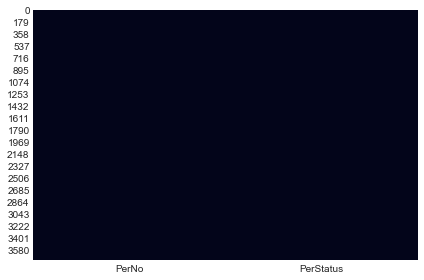

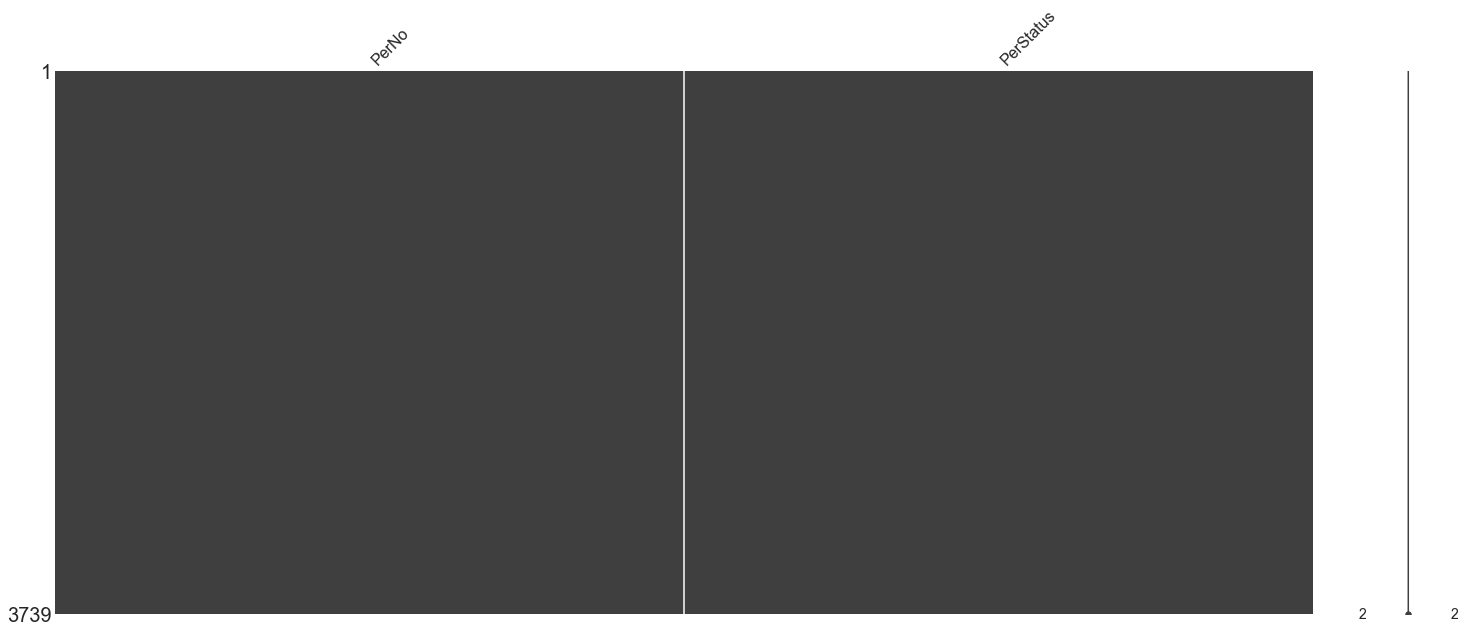

In [32]:
file_name = 'submission_2'

output = pd.DataFrame({'PerNo': df_submission.PerNo,
                       'PerStatus': test_pred})
output.to_csv(
    '../submit_answer/{file_name}.csv'.format(file_name=file_name), 
    index=False
)

df_submit_ans = local_extractor().read(file_path='../submit_answer/{file_name}.csv'.format(file_name=file_name))
df_submit_ans.head(3)

In [ ]:
df_submit_ans

In [ ]:
df_submission